# Aggregate and Groupby

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
aita_url = "https://raw.githubusercontent.com/roualdes/data/master/aita_clean_really_lightweight.csv"
dfa = pd.read_csv(aita_url)
dfa["body"].fillna("", inplace = True)

In [4]:
dfa[["is_asshole"]].aggregate(np.mean)

is_asshole    0.244
dtype: float64

In [5]:
dfa["date"] = pd.to_datetime(dfa["timestamp"], unit="s")
dfa["month"] = pd.DatetimeIndex(dfa["date"]).month

In [6]:
dfp = (dfa[["month", "is_asshole"]]
       .groupby("month", as_index = False)
       .aggregate(mean = ("is_asshole", np.mean), 
                  size = ("is_asshole", np.size)))
dfp

month      mean  size
0       1  0.166667    18
1       2  0.276596    47
2       3  0.276786   112
3       4  0.283019   106
4       5  0.327586   116
5       6  0.210526    95
6       7  0.292308   130
7       8  0.175573   131
8       9  0.200000   105
9      10  0.186916   107
10     11  0.218750    32
11     12  0.000000     1

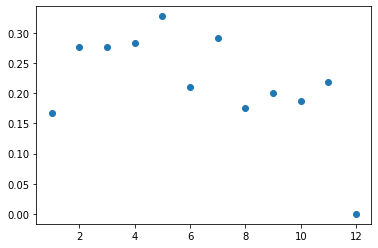

In [7]:
plt.scatter(dfp["month"], dfp["mean"]);